In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rosbag
from scipy.signal import savgol_filter
%matplotlib inline

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


# Stepper Timing

In [2]:
limit = [450, 350, 250, 200, 150, 125] # microseconds
increment = [-1., -0.25, -0.05, -0.1, -0.2, -0.05] # microseconds
#limit = [450, 250, 225, 200, 150, 125] # microseconds
#increment = [-1., -3., -0.05, -0.1, -0.2, -0.05] # microseconds
delay = 600

timing = [delay]
delta_timing = [increment[0]]
total = 0

while delay > limit[-1]:
    total += int(delay)
    for i in range(len(limit)):
        if delay > limit[i]:
            delay += increment[i]
            break
    timing.append(delay)
    delta_timing.append(increment[i])

rpm = 1./(360/1.8*2*limit[-1]/1e6)*60
print("total: {} s".format(total/1e6))
print("rpm: {} rpm".format(rpm))

total: 1.062101 s
rpm: 1200.0 rpm


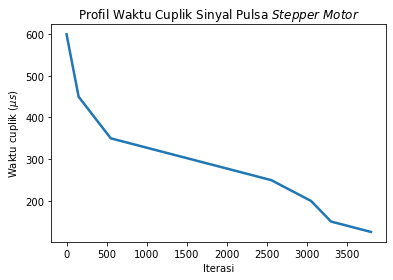

In [3]:
plt.plot(timing, linewidth=2.5)
plt.xlabel("Iterasi")
plt.ylabel(r"Waktu cuplik ($\mu s$)")
plt.title(r"Profil Waktu Cuplik Sinyal Pulsa $Stepper$ $Motor$")
plt.savefig("profil_sinyal_stepper.png", dpi=500, transparent=True)
plt.show()

# Import Rosbag Data

In [4]:
ls

log_steer_2020-07-17-09-43-48.bag
log_steer_dua_orang_lantai_licin_2020-08-12-20-06-32.bag
log_steer_tanpa_orang_laintai_licin_2020-08-12-20-04-45.bag
profil_kecepatan_sudut_kemudi.png
profil_sinyal_stepper.png
profil_sudut_kemudi.png
steering_angle_calibration.ipynb


In [5]:
bag = rosbag.Bag('log_steer_tanpa_orang_laintai_licin_2020-08-12-20-04-45.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Control': 'f3ff5e621674977340f826fa8303fddf', 'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/Control', message_count=926, connections=1, frequency=20.00517025102427), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=2305, connections=1, frequency=49.607380248373744)})

# Tanpa Orang Lantai Licin

In [6]:
bag = rosbag.Bag('log_steer_tanpa_orang_laintai_licin_2020-08-12-20-04-45.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Control': 'f3ff5e621674977340f826fa8303fddf', 'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/Control', message_count=926, connections=1, frequency=20.00517025102427), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=2305, connections=1, frequency=49.607380248373744)})

In [7]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_steering_setpoint = []
list_steering_delta = []
list_steering_angle = []
list_steering_absolute_encoder = []

for topic, msg, t in bag.read_messages(topics=['/logging_arduino']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_steering_setpoint.append(msg.steering_setpoint)
    list_steering_delta.append(msg.steering_delta)
    list_steering_angle.append(msg.steering_angle)
    list_steering_absolute_encoder.append(msg.steering_absolute_encoder)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header_1 = np.array(list_t_header)
list_t_header_1 -= list_t_header_1[0]

dt = list_t[1:] - list_t[:-1]
dt_header_1 = list_t_header_1[1:] - list_t_header_1[:-1]

#t_filtered = savgol_filter(np.array(list_t), 101, 3)
#t_header_filtered_1 = savgol_filter(np.array(list_t_header), 101, 3)

steering_setpoint_1 = np.array(list_steering_setpoint)
steering_delta_1 = savgol_filter(np.array(list_steering_delta), 101, 3)
steering_angle_1 = savgol_filter(np.array(list_steering_angle), 101, 3)
#w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)
w_filtered_header_1 = savgol_filter(np.gradient(steering_angle_1, list_t_header_1), 101, 3)

Sampling Rate yang digunakan di rospy adalah 50 Hz

dt_header
mean: 0.020076608906189602
std: 0.0003661912808192731



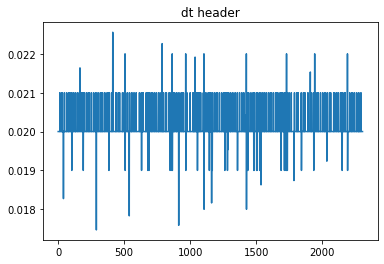

In [8]:
print('Sampling Rate yang digunakan di rospy adalah 50 Hz\n')
print('dt_header')
print('mean: {}'.format(np.mean(dt_header_1)))
print('std: {}'.format(np.std(dt_header_1)))
print('')

plt.plot(dt_header_1)
plt.title("dt header")
plt.show()

In [9]:
idx1 = np.where(np.abs(steering_setpoint_1[1:] - steering_setpoint_1[:-1]) >= 1)[0]
idx_1 = [idx1[0], -1]#idx_1[-1] + 500]

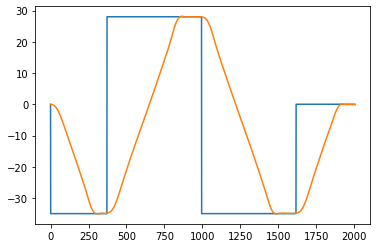

In [10]:
plt.plot(steering_setpoint_1[idx_1[0]:idx_1[1]])
plt.plot(steering_angle_1[idx_1[0]:idx_1[1]])

# Dua Orang Lantai Licin

## Import Data

In [11]:
bag = rosbag.Bag('log_steer_dua_orang_lantai_licin_2020-08-12-20-06-32.bag')
bag.get_type_and_topic_info()

TypesAndTopicsTuple(msg_types={'pkg_ta/Control': 'f3ff5e621674977340f826fa8303fddf', 'pkg_ta/LogArduino': '794f6f831f1064c1b29b65087ebb232f'}, topics={'/control_signal': TopicTuple(msg_type='pkg_ta/Control', message_count=908, connections=1, frequency=20.000782043517862), '/logging_arduino': TopicTuple(msg_type='pkg_ta/LogArduino', message_count=2264, connections=1, frequency=49.6531868548158)})

In [12]:
list_topic = []
list_msg = []
list_t = []
list_seq = []
list_t_header = []
list_steering_setpoint = []
list_steering_delta = []
list_steering_angle = []
list_steering_absolute_encoder = []

for topic, msg, t in bag.read_messages(topics=['/logging_arduino']):
    list_topic.append(topic)
    list_msg.append(msg)
    list_t.append(t.secs + t.nsecs/1e9)
    list_seq.append(msg.header.seq)
    list_t_header.append(msg.header.stamp.secs + msg.header.stamp.nsecs / 1e9)
    list_steering_setpoint.append(msg.steering_setpoint)
    list_steering_delta.append(msg.steering_delta)
    list_steering_angle.append(msg.steering_angle)
    list_steering_absolute_encoder.append(msg.steering_absolute_encoder)
    
list_t = np.array(list_t)
list_t -= list_t[0]
list_t_header_2 = np.array(list_t_header)
list_t_header_2 -= list_t_header_2[0]

dt = list_t[1:] - list_t[:-1]
dt_header_2 = list_t_header_2[1:] - list_t_header_2[:-1]

#t_filtered = savgol_filter(np.array(list_t), 101, 3)
#t_header_filtered_2 = savgol_filter(np.array(list_t_header), 101, 3)

steering_setpoint_2 = np.array(list_steering_setpoint)
steering_delta_2 = savgol_filter(np.array(list_steering_delta), 101, 3)
steering_angle_2 = savgol_filter(np.array(list_steering_angle), 101, 3)
#w_filtered = savgol_filter(np.gradient(steering_angle, t_filtered), 101, 3)
w_filtered_header_2 = savgol_filter(np.gradient(steering_angle_2, list_t_header_2), 101, 3)

Sampling Rate yang digunakan di rospy adalah 50 Hz

dt_header
mean: 0.02006417104642685
std: 0.0003415855755810096



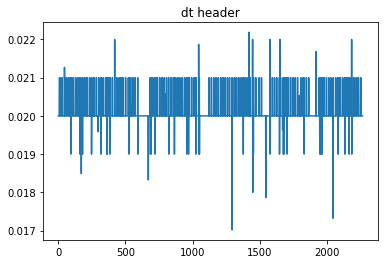

In [13]:
print('Sampling Rate yang digunakan di rospy adalah 50 Hz\n')
print('dt_header')
print('mean: {}'.format(np.mean(dt_header_2)))
print('std: {}'.format(np.std(dt_header_2)))
print('')

plt.plot(dt_header_2)
plt.title("dt header")
plt.show()

In [14]:
idx2 = np.where(np.abs(steering_setpoint_2[1:] - steering_setpoint_2[:-1]) >= 1)[0]
idx_2 = [idx2[0], -1]#idx_2[-1] + 500]

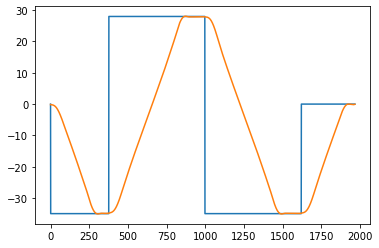

In [15]:
plt.plot(steering_setpoint_2[idx_2[0]:idx_2[1]])
plt.plot(steering_angle_2[idx_2[0]:idx_2[1]])

# Analisis dan PLOT

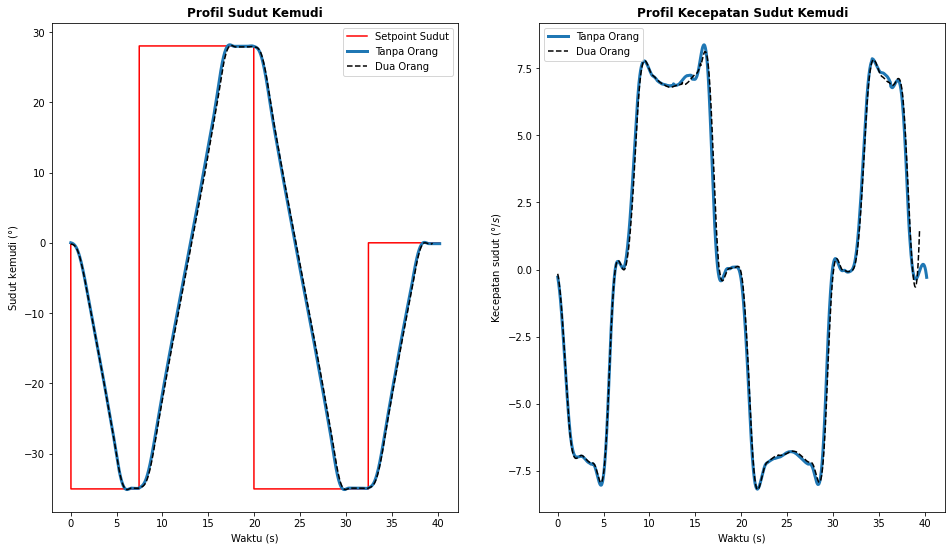

In [16]:
scale = 1.
plt.figure(figsize=(16*scale, 9*scale))

# Plot the steering angle
plt.subplot(1,2,1)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_setpoint_1[idx_1[0]:idx_1[1]], label=r'Setpoint Sudut', color='red')
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_angle_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], steering_angle_2[idx_2[0]:idx_2[1]], label='Dua Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Sudut kemudi $(\degree)$')
plt.title('Profil Sudut Kemudi', fontweight='bold')
plt.legend()

# Plot the steering angle
plt.subplot(1,2,2)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], w_filtered_header_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], w_filtered_header_2[idx_2[0]:idx_2[1]], label='Dua Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Kecepatan sudut $(\degree/s)$')
plt.title('Profil Kecepatan Sudut Kemudi', fontweight='bold')
plt.legend()

#plt.savefig('kalibrasi_absolute_encoder.png', dpi=600, transparent=True)
plt.show()

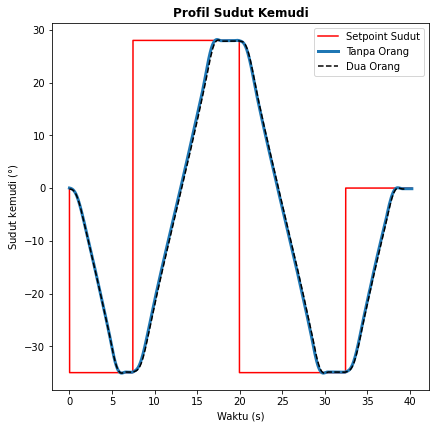

In [17]:
scale = 0.75
plt.figure(figsize=(9*scale, 9*scale))

# Plot the steering angle
plt.subplot(1,1,1)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_setpoint_1[idx_1[0]:idx_1[1]], label=r'Setpoint Sudut', color='red')
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], steering_angle_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], steering_angle_2[idx_2[0]:idx_2[1]], label='Dua Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Sudut kemudi $(\degree)$')
plt.title('Profil Sudut Kemudi', fontweight='bold')
plt.legend()
plt.savefig('profil_sudut_kemudi', dpi=600, transparent=True)
plt.show()

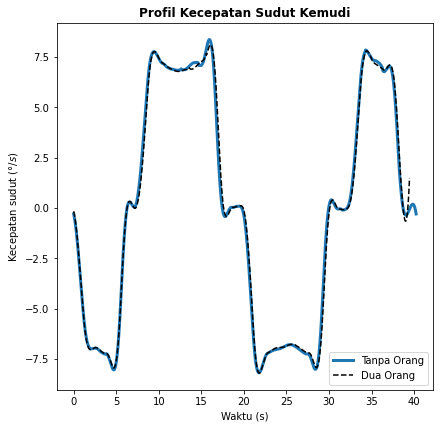

In [18]:
scale = 0.75
plt.figure(figsize=(9*scale, 9*scale))

# Plot the steering angle
plt.subplot(1,1,1)
plt.plot(list_t_header_1[idx_1[0]:idx_1[1]] - list_t_header_1[idx_1[0]], w_filtered_header_1[idx_1[0]:idx_1[1]], label='Tanpa Orang', linewidth=3.0)
plt.plot(list_t_header_2[idx_2[0]:idx_2[1]] - list_t_header_2[idx_2[0]], w_filtered_header_2[idx_2[0]:idx_2[1]], label='Dua Orang', linestyle='--', color='black', linewidth=1.5)
plt.xlabel('Waktu (s)')
plt.ylabel(r'Kecepatan sudut $(\degree/s)$')
plt.title('Profil Kecepatan Sudut Kemudi', fontweight='bold')
plt.legend()
plt.savefig('profil_kecepatan_sudut_kemudi', dpi=600, transparent=True)
plt.show()

# Waktu yang Dibutuhkan

# Tanpa Beban

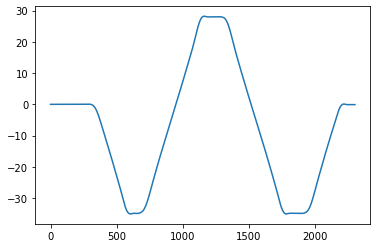

In [19]:
plt.plot(steering_angle_1)

In [20]:
idx1

array([ 299,  670, 1293, 1915])

In [21]:
np.where(np.abs(steering_delta_1) <= 0.03)

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
         110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
         121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
         132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
         143,  144,  145,  146,  147, 

In [22]:
print("STAGE 1: {} s".format(list_t_header_1[595] - list_t_header_1[idx1[0]]))
print("STAGE 2: {} s".format(list_t_header_1[1151] - list_t_header_1[idx1[1]]))
print("STAGE 3: {} s".format(list_t_header_1[1775] - list_t_header_1[idx1[2]]))
print("STAGE 4: {} s".format(list_t_header_1[2211] - list_t_header_1[idx1[3]]))

STAGE 1: 5.942385911941528 s
STAGE 2: 9.660765886306763 s
STAGE 3: 9.676062822341919 s
STAGE 4: 5.945096015930176 s


# Dengan 2 Orang

In [23]:
idx2

array([ 295,  671, 1292, 1915])

In [24]:
np.where(np.abs(steering_delta_2) <= 0.03)

(array([ 591,  592,  593,  611,  612,  613,  614, 1159, 1160, 1161, 1175,
        1176, 1177, 1178, 1179, 1779, 1780, 1781, 1798, 1799, 1800, 1801,
        1802, 2215, 2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224,
        2225, 2226, 2227, 2228]),)

In [25]:
print("STAGE 1: {} s".format(list_t_header_1[591] - list_t_header_1[idx1[0]]))
print("STAGE 2: {} s".format(list_t_header_1[1159] - list_t_header_1[idx1[1]]))
print("STAGE 3: {} s".format(list_t_header_1[1779] - list_t_header_1[idx1[2]]))
print("STAGE 4: {} s".format(list_t_header_1[2215] - list_t_header_1[idx1[3]]))

STAGE 1: 5.862385988235474 s
STAGE 2: 9.821765899658203 s
STAGE 3: 9.756062984466553 s
STAGE 4: 6.0250959396362305 s
